In [2]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from salishsea_tools import (
        viz_tools,
        nc_tools,
)

In [3]:
%matplotlib inline

In [6]:
# load the nc file

tracers = nc.Dataset('/ocean/ssahu/nemo-code/NEMOGCM/CONFIG/MY_GYRE/EXP00/GYRE_5d_00010101_00011230_grid_T.nc')

In [7]:
nc_tools.show_dimensions(tracers)

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 32

<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 22

<class 'netCDF4._netCDF4.Dimension'>: name = 'deptht', size = 31

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 72

<class 'netCDF4._netCDF4.Dimension'>: name = 'tbnds', size = 2



In [8]:
nc_tools.show_variables(tracers)

odict_keys(['nav_lon', 'nav_lat', 'deptht', 'time_counter', 'time_counter_bnds', 'votemper', 'vosaline', 'sosstsst', 'sosaline', 'sossheig', 'sowaflup', 'soshfldo', 'sowaflcd', 'sohefldo', 'somxl010', 'somixhgt', 'sowindsp', 'sohefldp', 'sowafldp', 'sobowlin', 'sothedep', 'so20chgt', 'so28chgt', 'sohtc300'])


In [9]:
nc_tools.show_dataset_attrs(tracers)

file format: NETCDF4
Conventions: CF-1.1
file_name: GYRE_5d_00010101_00011230_grid_T.nc
production: An IPSL model
TimeStamp: 2016-OCT-18 12:26:22 GMT-0700


In [10]:
nc_tools.show_variable_attrs(tracers, 'time_counter')

#why time is showing incorrectly when the run started ?

<class 'netCDF4._netCDF4.Variable'>
float64 time_counter(time_counter)
    axis: T
    standard_name: time
    units: seconds since 0001-01-01 00:00:00
    calendar: 360d
    title: Time
    long_name: Time axis
    time_origin:  0001-JAN-01 00:00:00
    bounds: time_counter_bnds
unlimited dimensions: time_counter
current shape = (72,)
filling on, default _FillValue of 9.969209968386869e+36 used



In [11]:
tracers.variables['time_counter'][:] #time values measured in seconds since the date and time the run started

array([   216000.,    648000.,   1080000.,   1512000.,   1944000.,
         2376000.,   2808000.,   3240000.,   3672000.,   4104000.,
         4536000.,   4968000.,   5400000.,   5832000.,   6264000.,
         6696000.,   7128000.,   7560000.,   7992000.,   8424000.,
         8856000.,   9288000.,   9720000.,  10152000.,  10584000.,
        11016000.,  11448000.,  11880000.,  12312000.,  12744000.,
        13176000.,  13608000.,  14040000.,  14472000.,  14904000.,
        15336000.,  15768000.,  16200000.,  16632000.,  17064000.,
        17496000.,  17928000.,  18360000.,  18792000.,  19224000.,
        19656000.,  20088000.,  20520000.,  20952000.,  21384000.,
        21816000.,  22248000.,  22680000.,  23112000.,  23544000.,
        23976000.,  24408000.,  24840000.,  25272000.,  25704000.,
        26136000.,  26568000.,  27000000.,  27432000.,  27864000.,
        28296000.,  28728000.,  29160000.,  29592000.,  30024000.,
        30456000.,  30888000.])

In [12]:
#to use further let us alias the time counter as time steps

timesteps = tracers.variables['time_counter']

In [13]:
nc_tools.show_variable_attrs(tracers, 'sossheig')
ssh = tracers.variables['sossheig']
lats = tracers.variables['nav_lat']
lons = tracers.variables['nav_lon']

<class 'netCDF4._netCDF4.Variable'>
float32 sossheig(time_counter, y, x)
    units: m
    standard_name: sea surface height
    _FillValue: 9.96921e+36
    long_name: sea surface height
    online_operation: ave(X)
    interval_operation: 7200.0
    interval_write: 432000.0
    coordinates: time_counter nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (72, 22, 32)
filling on


In [14]:
ssh.shape

(72, 22, 32)

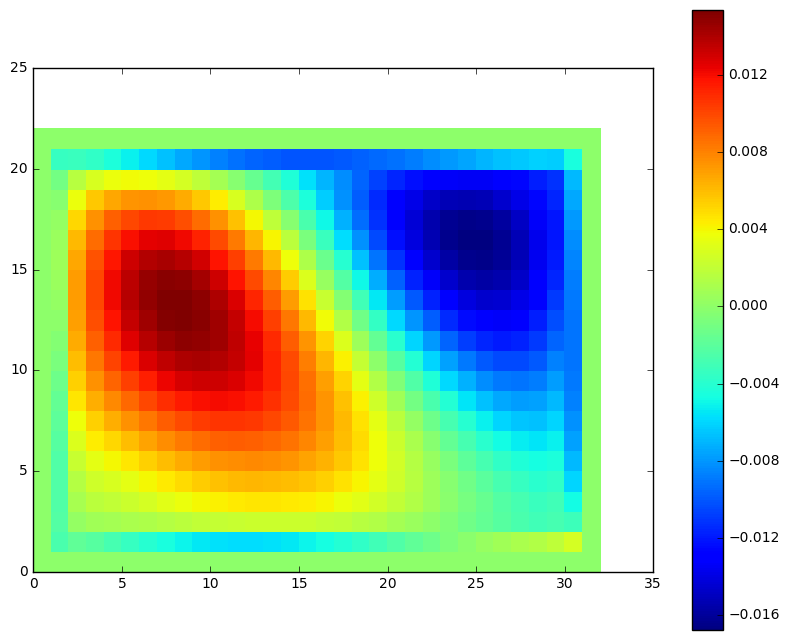

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ssh[0])
fig.colorbar(mesh)

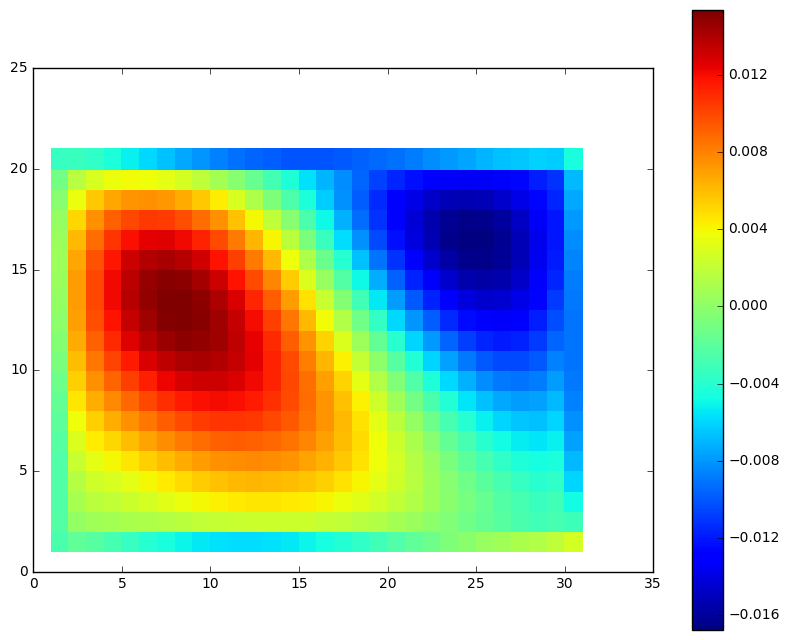

In [16]:
# now let us mask the land



ssh0 = np.ma.masked_values(ssh[0], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ssh0)
fig.colorbar(mesh)

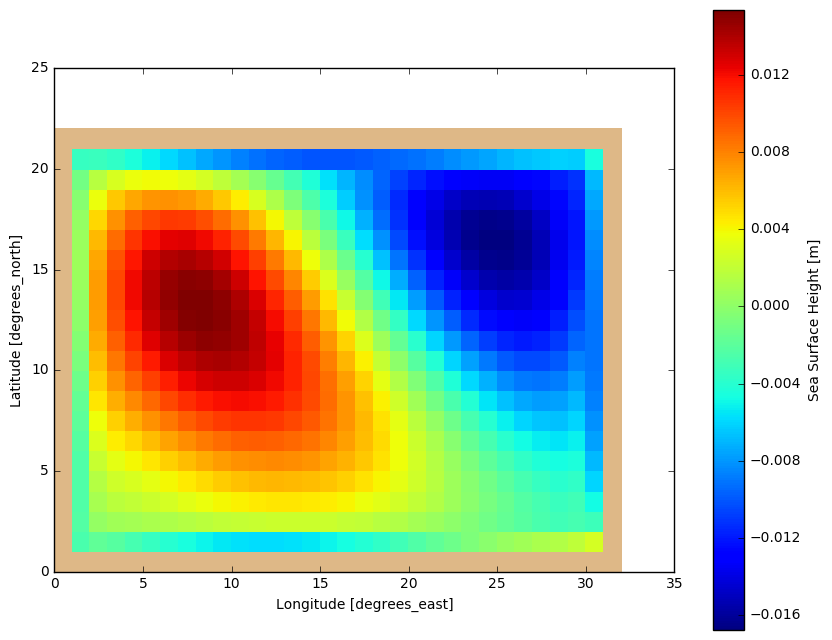

In [17]:
# plotting the gyre run ssh with the latitude and longitude



ssh0 = np.ma.masked_values(ssh[0], 0)  #for higher accuracy masking should always be done from bathymetry and not from ssh data
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(ssh0)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(ssh0, cmap=cmap)
cbar = fig.colorbar(mesh)

ax.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lons))
ax.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lats))
cbar.set_label('{label} [{units}]'.format(label=ssh.long_name.title(), units=ssh.units))



In [18]:
ssh.shape

(72, 22, 32)

In [19]:
#to plot ssh at different time using a loop and zip command as different subplots

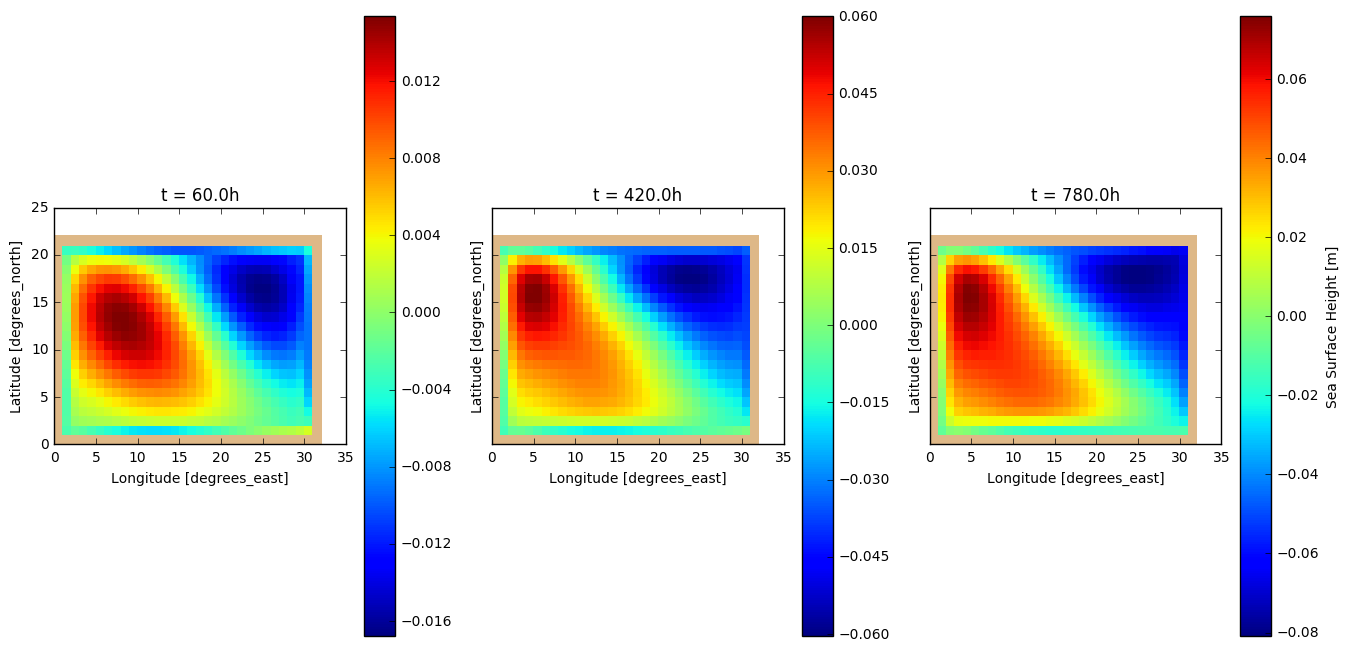

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

time_steps = (0, 3, 6)
for ax, t in zip(axs, time_steps):
    ssh_t = np.ma.masked_equal(ssh[t], 0)
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(ssh_t, cmap=cmap)
    cbar = fig.colorbar(mesh, ax=ax)
    ax.set_title('t = {:.1f}h'.format(timesteps[t] / 3600))
    ax.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lons))
    ax.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lats))
    
cbar.set_label('{label} [{units}]'.format(label=ssh.long_name.title(), units=ssh.units))
    
    



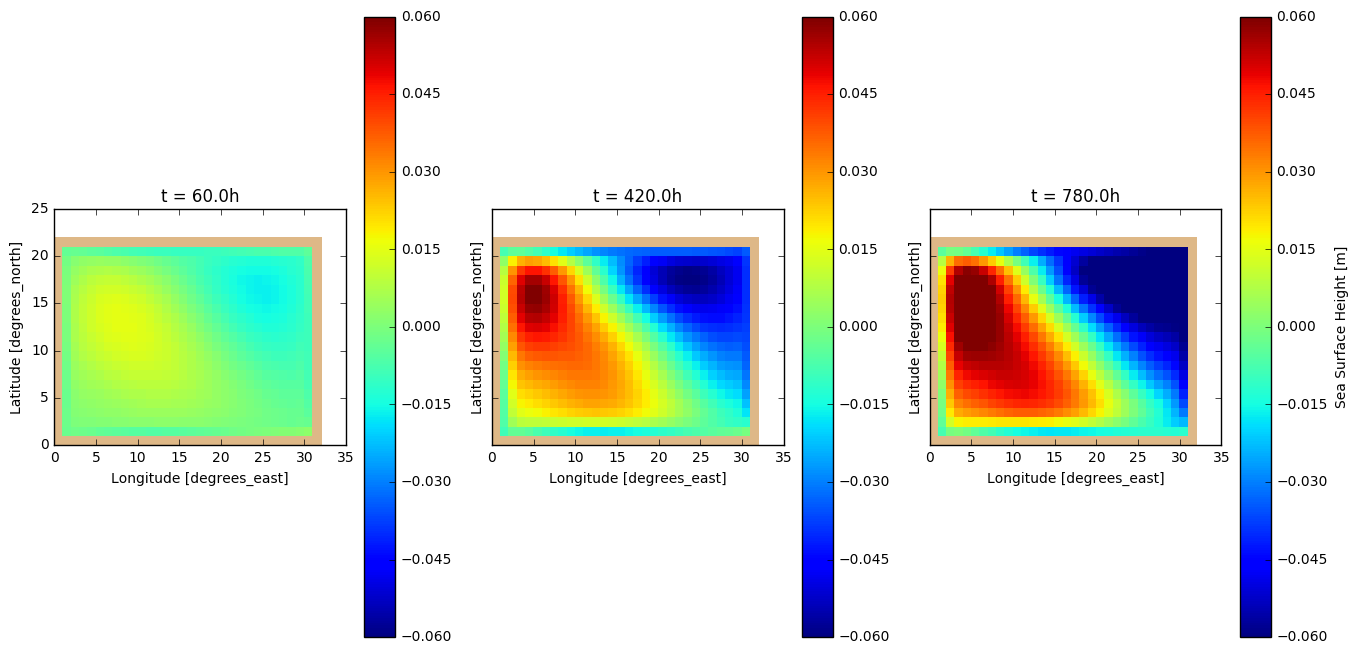

In [31]:
# keeping the colorbar limits constant

fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

time_steps = (0, 3, 6)
for ax, t in zip(axs, time_steps):
    ssh_t = np.ma.masked_equal(ssh[t], 0)
    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(ssh_t, cmap=cmap, vmin = -0.06, vmax=0.06)
    cbar = fig.colorbar(mesh, ax=ax)
    ax.set_title('t = {:.1f}h'.format(timesteps[t] / 3600))
    ax.set_xlabel('{longitude.long_name} [{longitude.units}]'.format(longitude=lons))
    ax.set_ylabel('{latitude.long_name} [{latitude.units}]'.format(latitude=lats))
    
cbar.set_label('{label} [{units}]'.format(label=ssh.long_name.title(), units=ssh.units))

In [48]:
# need the nc file for the gyre run to plot the coastline

In [49]:
nc_tools.show_variable_attrs(tracers, 'votemper') #this goes on to show that temperature has (t,z,y,x) in 4 dimensions

<class 'netCDF4._netCDF4.Variable'>
float32 votemper(time_counter, deptht, y, x)
    units: degC
    standard_name: temperature
    _FillValue: 9.96921e+36
    long_name: temperature
    online_operation: ave(X)
    interval_operation: 7200.0
    interval_write: 432000.0
    coordinates: time_counter deptht nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (72, 31, 22, 32)
filling on


In [51]:
# ssh is only for the surface but temperature shows a four dimensional array


# lets check how the vertical levels are stacked in the NEMO grids
nc_tools.show_variable_attrs(tracers, 'deptht')



tracers.variables['deptht'][:]





<class 'netCDF4._netCDF4.Variable'>
float32 deptht(deptht)
    axis: Z
    standard_name: model_level_number
    units: m
    positive: down
    valid_min: 4.97527
    valid_max: 4451.26
    title: deptht
    long_name: Vertical T levels
unlimited dimensions: 
current shape = (31,)
filling on, default _FillValue of 9.969209968386869e+36 used



array([    4.9752655 ,    15.09642696,    25.53630829,    36.45035934,
          48.0688858 ,    60.73197556,    74.9393158 ,    91.41963196,
         111.22411346,   135.84466553,   167.3487854 ,   208.50358582,
         262.82952881,   334.48800659,   427.8961792 ,   547.02954102,
         694.5501709 ,   871.09747314,  1075.10339355,  1303.23583984,
        1551.22729492,  1814.70251465,  2089.74609375,  2373.15991211,
        2662.48999023,  2955.93261719,  3252.20141602,  3550.39672852,
        3849.89794922,  4150.28125   ,  4451.25927734], dtype=float32)

In [56]:
# we see that the vertical grid spacing gradually (not gradually but rather rapidly :-D) increases as we go further down

# let us assign python names to the variables which we are going to plot eventually

temper = tracers.variables['votemper']
depth = tracers.variables['deptht']

array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  23.71797562,  23.50548553, ...,  21.95631599,
          21.90969849,   0.        ],
        [  0.        ,  23.50655174,  23.4353199 , ...,  21.81665421,
          21.71551895,   0.        ],
        ..., 
        [  0.        ,  22.43837929,  22.39578819, ...,  21.01207161,
          21.06049538,   0.        ],
        [  0.        ,  22.36312675,  22.30076599, ...,  21.05270767,
          21.06493187,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  23.34355354,  23.50263977, ...,  21.95632362,
          21.90970802,   0.        ],
        [  0.        ,  23.4884491 ,  23.43473053, ...,  21.81666183,
          21.71552849,   0.        ],
        ...,

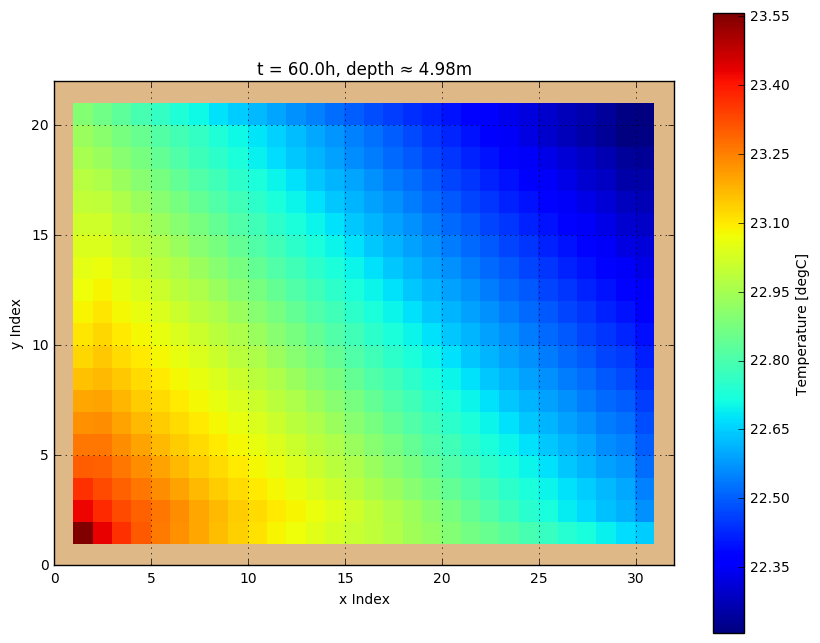

In [62]:
t, zlevel = 0, 0
temper_tz = np.ma.masked_values(temper[t, zlevel], 0)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(temper_tz, cmap=cmap)
cbar = fig.colorbar(mesh)
plt.axis((0, temper_tz.shape[1], 0, temper_tz.shape[0]))

ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
cbar.set_label('{label} [{units}]'.format(label=temper.long_name.title(), units=temper.units))
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d = depth[zlevel], z=depth))

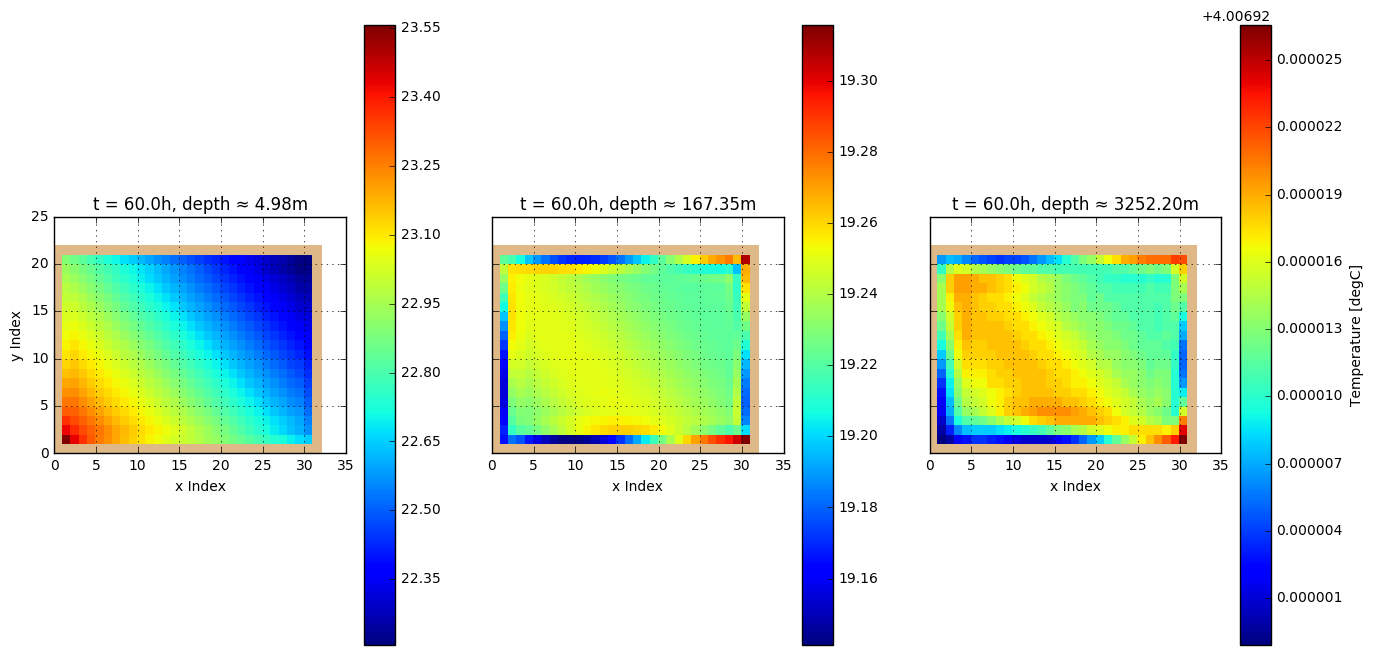

In [65]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
for ax in axs:
    viz_tools.set_aspect(ax)

cmap = plt.get_cmap('jet')
cmap.set_bad('burlywood')

t = 0
levels = (0, 10, 26)
for ax, z in zip(axs, levels):
    temper_tz = np.ma.masked_equal(temper[t, z], 0)
    mesh = ax.pcolormesh(temper_tz, cmap=cmap)
    cbar = fig.colorbar(mesh, ax=ax)
    ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=depth[z], z=depth))
    ax.set_xlabel('x Index')
    ax.grid()
    
axs[0].set_ylabel('y Index')
cbar.set_label('{label} [{units}]'.format(label=temper.long_name.title(), units=temper.units))

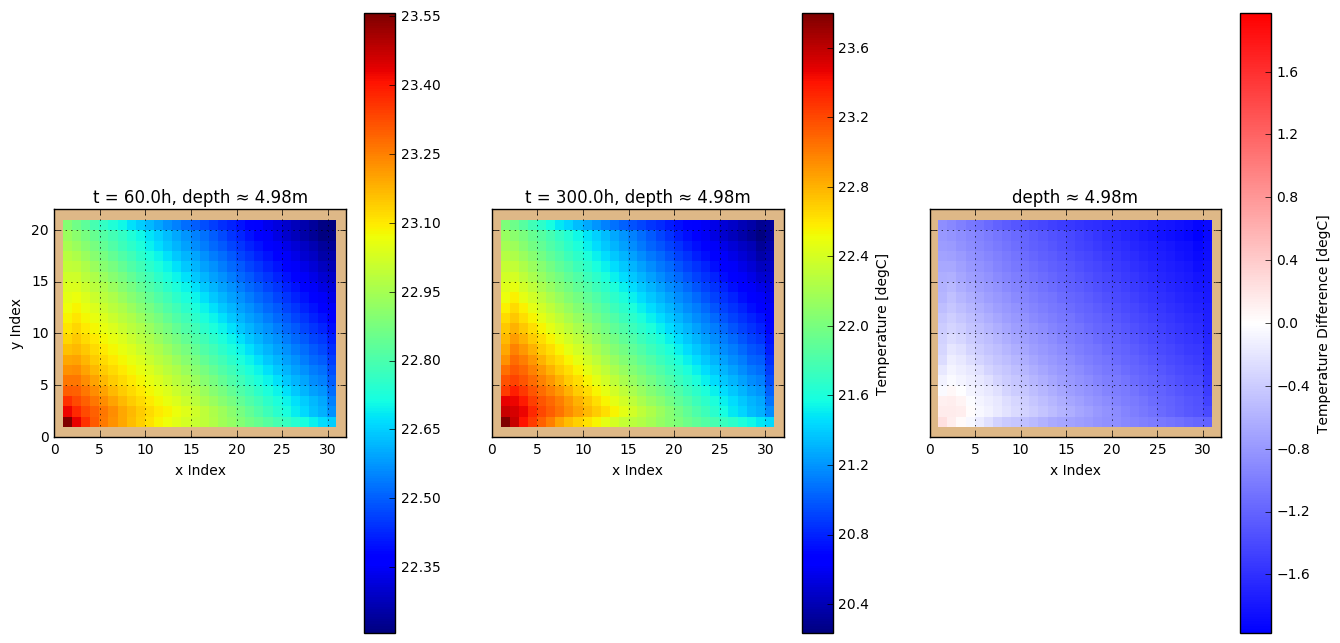

In [68]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
for ax in axs:
    viz_tools.set_aspect(ax)
    
cmap = plt.get_cmap('jet')
anomaly_cmap = plt.get_cmap('bwr')
for c in (cmap, anomaly_cmap):
    c.set_bad('burlywood')

time_steps = (0, 2)
z = 0

# Temperature fields at the time steps
for ax, t in zip(axs[:2], time_steps):
    temper_tz = np.ma.masked_values(temper[t, z], 0)
    mesh = ax.pcolormesh(temper_tz, cmap=cmap)
    cbar = fig.colorbar(mesh, ax=ax)
    ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=depth[z], z=depth))
    ax.set_xlabel('x Index')
    ax.set_xlim(0, temper_tz.shape[1])
    ax.set_ylim(0, temper_tz.shape[0])
    ax.grid()
axs[0].set_ylabel('y Index')
cbar.set_label('{label} [{units}]'.format(label=temper.long_name.title(), units=temper.units))

# Temperature field difference between the time steps
ax = axs[2]
temper_diff = temper[time_steps[1], z] - temper[time_steps[0], z]
temper_diff = np.ma.masked_values(temper_diff, 0, copy=False)
abs_max = viz_tools.calc_abs_max(temper_diff)
mesh = ax.pcolormesh(temper_diff, cmap=anomaly_cmap, vmin=-abs_max, vmax=abs_max)
cbar = fig.colorbar(mesh, ax=ax)
ax.set_title(u'depth \u2248 {d:.2f}{z.units}'.format(d=depth[z], z=depth))
ax.set_xlabel('x Index')
ax.set_xlim(0, temper_diff.shape[1])
ax.set_ylim(0, temper_diff.shape[0])
ax.grid()
cbar.set_label('{label} Difference [{units}]'.format(label=temper.long_name.title(), units=temper.units))